**Classification Challange**

Università degli studi di Cassino e del Lazio Meridionale

Medical Imaging and Applications (MAIA)

Taiabur Rahman

Workflow 
1. Preprocessing
2. Feature selection
3. Training
4. Testing
5. Result

In [49]:
# import libraries and classes  
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import matthews_corrcoef, balanced_accuracy_score
import seaborn
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [50]:
# Preprocess the data
def preprocess_data(df):
    X = df.iloc[:, 1:-1] # extract features (remove ID and Label)
    y = df.iloc[:, -1] # extract labels (last column)
    # Handle missing values, feature scaling, or feature selection as needed
    scaler = StandardScaler()
    X = scaler.fit_transform(X) # scale the features

    # Map class labels to binary values
    label_mapping = {'MCI': 1, 'CTL': 0}
    y = y.map(label_mapping)
    
    return X, y
# Preprocess the data
def preprocess_test_data(df):
    X = df.iloc[:, 1:] # extract features (remove ID)
    y = df.iloc[:,:] 
    # Handle missing values, feature scaling, or feature selection as needed
    scaler = StandardScaler()
    X = scaler.fit_transform(X) # scale the features
    return X, y

# Split the train dataset into a training set and a validation set
def split_train_validation(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.7, random_state=42)
    return X_train, X_val, y_train, y_val
def pro_pca(X):
    # Apply PCA
    pca = PCA(n_components=15)  # Specify the number of components to retain
    X_pca = pca.fit_transform(X)
    return X_pca
# Train a binary classification model using logistic regression
def train_logistic_regression(X_train, y_train, X_val, y_val):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    sensitivity = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    mcc = matthews_corrcoef(y_val, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_val, y_pred)
    return model, accuracy, precision, sensitivity, f1, roc_auc,mcc,balanced_accuracy
# Train a binary classification model using decision tree
def train_decision_tree(X_train, y_train, X_val, y_val):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    sensitivity = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    return model, accuracy, precision, sensitivity, f1, roc_auc

# Train a binary classification model using random forest
def train_random_forest(X_train, y_train, X_val, y_val):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    sensitivity = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    return model, accuracy, precision, sensitivity, f1, roc_auc

def train_svc(X_train_ADCTL, y_train_ADCTL,X_test_ADCTL,y_test_ADCTL):
    # Train the SVM model
    model = SVC()
    model.fit(X_train_ADCTL, y_train_ADCTL)

    # Predict on the test set
    y_pred = model.predict(X_test_ADCTL)
    # Evaluate the model
    accuracy = accuracy_score(y_test_ADCTL, y_pred)
    precision = precision_score(y_test_ADCTL, y_pred)
    sensitivity = recall_score(y_test_ADCTL, y_pred)
    f1 = f1_score(y_test_ADCTL, y_pred)
    roc_auc = roc_auc_score(y_test_ADCTL, y_pred)
    return model, accuracy, precision, sensitivity, f1, roc_auc

# Define a function to train and evaluate a model using cross-validation
def train_and_evaluate_model(model, X, y):
    # Perform 10-fold cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    return scores.mean()

# Create a pipeline with PCA and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the data
    ('pca', PCA(n_components=2)),  # Apply PCA with 2 components
    ('classifier', LogisticRegression())  # Logistic regression classifier
])

In [51]:
# import datasets
MCICTLtrain_dataset=pd.read_csv("datasets/MCICTLtrain.csv")
# import test datasets
# MCICTLtest_dataset=pd.read_csv("datasets/MCICTLtest.csv")
MCICTLtest_dataset=pd.read_csv("datasets/MCICTLtest_wl.csv")

In [52]:
MCICTLtrain_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Columns: 595 entries, ID to Label
dtypes: float64(593), object(2)
memory usage: 799.7+ KB


In [53]:
MCICTLtrain_dataset["Label"].value_counts()

Label
MCI    90
CTL    82
Name: count, dtype: int64

In [54]:
MCICTLtrain_dataset["Label"].value_counts()
# Data preprocessing
MCICTL_x, MCICTL_y=preprocess_data(MCICTLtrain_dataset)
#Dataset split
MCICTL_train_x,MCICTL_val_x,MCICTL_train_y,MCICTL_label_y=split_train_validation(MCICTL_x, MCICTL_y)


In [55]:
model_svm, acc, prec, rec, f1, roc_auc=train_svc(MCICTL_train_x,MCICTL_train_y,MCICTL_val_x,MCICTL_label_y)
print(model_svm, acc, prec, rec, f1, roc_auc)

SVC() 0.8181818181818182 0.8571428571428571 0.8059701492537313 0.8307692307692308 0.8196517412935324


In [56]:
MCICTLpca=pro_pca(MCICTL_train_x)
MCICTLpca
# Create a DataFrame to store the ID, predicted probabilities, and predicted labels
pca_df = pd.DataFrame(data=MCICTLpca.round(4))

# print(pca_df)
# Save the DataFrame
pca_df.to_csv("0075718_Taiabur_MCICTLfeat.csv", index=False)

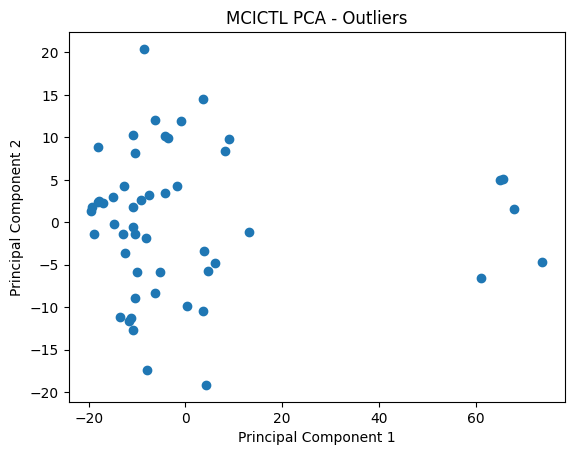

In [57]:
plt.scatter(MCICTLpca[:, 0], MCICTLpca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("MCICTL PCA - Outliers")
plt.show()

In [58]:


model_logistic_reg, acc, prec, rec, f1, roc_auc,mcc,ba=train_logistic_regression(MCICTL_train_x,MCICTL_train_y,MCICTL_val_x,MCICTL_label_y)
print(model_logistic_reg, acc, prec, rec, f1, roc_auc)

LogisticRegression_df=pd.DataFrame()
LogisticRegression_df['']=['MCIvsCTL']
LogisticRegression_df['Accuracy']=[acc.round(4)]
LogisticRegression_df['Sensitivity']=[rec.round(4)]
LogisticRegression_df['Spec']=[0]
LogisticRegression_df['Precision']=[prec.round(4)]
LogisticRegression_df['F1']=[f1.round(4)]
LogisticRegression_df['AUC']=[roc_auc.round(4)]
LogisticRegression_df['MCC']=[mcc.round(4)]
LogisticRegression_df['BA']=[ba.round(4)]

print(LogisticRegression_df)
LogisticRegression_df.to_csv("MCICTL_tr_summary.csv",index=False)

LogisticRegression() 0.7768595041322314 0.8225806451612904 0.7611940298507462 0.7906976744186047 0.7787451630735213
             Accuracy  Sensitivity  Spec  Precision      F1     AUC     MCC   
0  MCIvsCTL    0.7769       0.7612     0     0.8226  0.7907  0.7787  0.5544  \

       BA  
0  0.7787  


In [59]:
#RandomForest Classification
model_random_forest, acc, prec, rec, f1, roc_auc=train_random_forest(MCICTL_train_x,MCICTL_train_y,MCICTL_val_x,MCICTL_label_y)
print(model_random_forest, acc, prec, rec, f1, roc_auc)

RandomForestClassifier() 0.7851239669421488 0.8727272727272727 0.7164179104477612 0.7868852459016392 0.7933941404090658


In [60]:
MCICTLtest_dataset.describe()

,Background,Precentral_L,Precentral_R,Frontal_Sup_2_L,Frontal_Sup_2_R,Frontal_Mid_2_L,Frontal_Mid_2_R,Frontal_Inf_Oper_L,Frontal_Inf_Oper_R,Frontal_Inf_Tri_L,...,ZC3H3,ZFPM1,ZFYVE19,ZNF275,ZNF324,ZNF364,ZNF598,ZNF787,ZNFX1,ZYG11B
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,...,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,0.009129,0.264387,0.232834,0.321906,0.318878,0.369553,0.301750,0.335389,0.293638,0.344114,...,8.722709,8.178706,7.644863,8.568013,8.802715,9.411084,8.415150,9.078102,9.712756,10.114613
std,0.001100,0.039615,0.030859,0.039991,0.037825,0.044166,0.038338,0.041758,0.032604,0.049809,...,0.590639,0.644141,0.598421,0.770307,0.814077,0.664148,0.544066,0.760001,0.641165,0.693578
min,0.006831,0.206204,0.172326,0.218043,0.233074,0.287254,0.221138,0.219700,0.214163,0.262316,...,6.821336,5.897566,5.518360,5.921906,6.170246,7.163702,6.620083,6.314592,7.689816,7.990127
25%,0.008526,0.240417,0.212634,0.301691,0.295584,0.343866,0.279394,0.311400,0.269837,0.312705,...,8.567859,7.994792,7.648459,8.553254,8.710366,9.391054,8.376137,9.008915,9.584671,10.003759
50%,0.009144,0.257962,0.225563,0.311660,0.319217,0.362650,0.301864,0.334815,0.296216,0.334895,...,8.819444,8.249376,7.809721,8.769163,8.921023,9.596783,8.517658,9.291403,9.799255,10.302157
75%,0.009694,0.286897,0.249950,0.347596,0.346060,0.393208,0.316255,0.354258,0.315827,0.369564,...,9.124690,8.512920,7.953250,8.930667,9.213276,9.739669,8.748852,9.441090,10.098921,10.475099
max,0.012297,0.390380,0.331800,0.424622,0.407940,0.521218,0.447186,0.421689,0.360050,0.467935,...,9.361809,9.081613,8.293615,9.509996,9.845686,10.045600,9.051494,9.997427,10.621316,10.972951


In [61]:
MCICTL_test_x, MCICTL_test_y=preprocess_data(MCICTLtest_dataset)

y_pred_MCICTL=model_logistic_reg.predict(MCICTL_test_x)
y_predict_proba_MCICTL=model_logistic_reg.predict_proba(MCICTL_test_x)

# Create a DataFrame to store the ID, predicted probabilities, and predicted labels
predictions_df = pd.DataFrame(data=y_predict_proba_MCICTL.round(4),columns=['CTL','MCI'])
predictions_df["ID"] = MCICTLtest_dataset["ID"]
predictions_df["test_data_predicted_Label"] = y_pred_MCICTL

label_mapping = {0:'CTL', 1: 'MCI'}

# Replace the values in the DataFrame
predictions_df["test_data_predicted_Label"].replace(label_mapping, inplace=True)


In [62]:
# Save the DataFrame
predictions_df[["ID",'CTL','MCI',"test_data_predicted_Label"]].to_csv("0075718_Taiabur_MCICTLres.csv", index=False)

In [63]:
rfp=model_random_forest.predict(MCICTL_test_x)
acc = accuracy_score(MCICTL_test_y, rfp)
mcc = matthews_corrcoef(MCICTL_test_y, rfp)

print(acc,mcc)

0.7209302325581395 0.45179349720570805


In [64]:
acc = accuracy_score(MCICTL_test_y, y_pred_MCICTL)
mcc = matthews_corrcoef(MCICTL_test_y, y_pred_MCICTL)

print(acc,mcc)

0.6744186046511628 0.35141080507624767
